<a href="https://colab.research.google.com/github/chandradutta/CS23M021_A1/blob/master/DeepLearning_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing wandb
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project='DL_Assignment_1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chandraduttamamidi (cs23m021). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


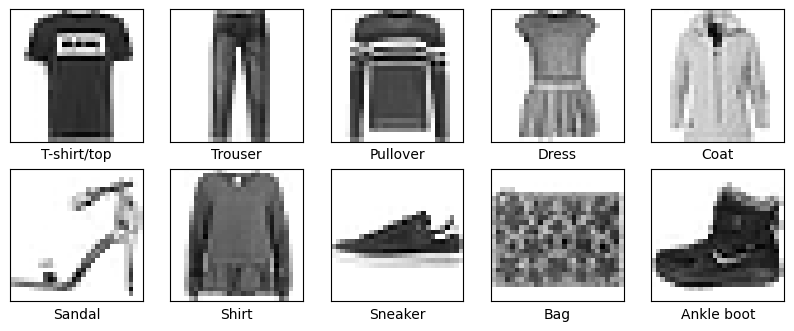

In [ ]:
# import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# wandb.init(project="fashion-mnist-sample-images")

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# print (len(train_images[0]))


# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    idx = next(idx for idx, label in enumerate(y_train) if label == i)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    # wandb.log({f"example_{class_names[i]}": [wandb.Image(x_train[idx], caption=class_names[i])]})

# wandb.finish()

In [ ]:
import numpy as np
# def sigmoid(z):
#     clipped_z=np.clip(z,-500, 500)
#     # return 1 / (1 + np.exp(-clipped_z))
def softmax(z):
    # z=np.clip(z,-500,500)
    eps = 1e-6
    return (np.exp(z-max(z)) / (sum(np.exp(z-max(z))) + eps))
def sigmoid(z):
    clipped_z=np.clip(z,-500, 500)
    return 1 / (1 + np.exp(-clipped_z))
def tanh(z):
  clipped_z = np.clip(z, -50, 50)
  return np.tanh(clipped_z)
def relu(Z):
  A = np.maximum(0, Z)
  return A
#derivatives
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def relu_derivative(z):
  return np.where(z>0,1,0)
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))


#weights initialization

def weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.random.randn(n,1))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.random.randn(n,1))
  ws.append(np.random.randn(10,n))
  bs.append(np.random.randn(10,1))
  return ws,bs

def xavier_weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.zeros((n,1)))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.zeros((n,1)))
  ws.append(np.random.randn(10,n))
  bs.append(np.zeros((10,1)))
  return ws,bs






#forward

def calculate_pre_activation(weights, input_data, biases):
    return np.matmul(weights, input_data) + biases

def apply_activation(pre_activation, activation_function):
    if activation_function == 'sigmoid':
        return sigmoid(pre_activation)
    elif activation_function == 'tanh':
        return tanh(pre_activation)
    else :
        return relu(pre_activation)
def forward(x_train, ws, bs, activationfun, hidLay):
    x = x_train.reshape(784, 1) / 255.0
    pre_act = [0 for i in range(hidLay + 1)]
    activ = [0 for i in range(hidLay + 1)]

    for i in range(hidLay):
        if i == 0:
            pre_act[i] = calculate_pre_activation(ws[i], x, bs[i])
        else:
            pre_act[i] = calculate_pre_activation(ws[i], activ[i - 1], bs[i])

        activ[i] = apply_activation(pre_act[i], activationfun)
        # print(pre_act[i].shape)
        # print(activ[i].shape)
    pre_act[hidLay] = calculate_pre_activation(ws[hidLay], activ[hidLay - 1], bs[hidLay])
    activ[hidLay] = softmax(pre_act[hidLay])
    # print(pre_act[-1].shape)
    # print(activ[-1].shape)
    # prin(1)
    return activ, pre_act

#calculate back propagation

def calculate_gradients(d_a, activation_prev, theta, activationfun):
    d_w = np.matmul(d_a, activation_prev.T)
    d_b = np.copy(d_a)
    return d_w, d_b

def update_d_a(d_a, pre_activation_prev, theta, activationfun):
    d_h_prev = np.matmul(theta.T, d_a)

    if activationfun == 'sigmoid':
        d_a_new = np.multiply(d_h_prev, sigmoid_derivative(pre_activation_prev))
    elif activationfun == 'tanh':
        d_a_new = np.multiply(d_h_prev, tanh_derivative(pre_activation_prev))
    else:
        d_a_new = np.multiply(d_h_prev, relu_derivative(pre_activation_prev))

    return d_a_new



def compute(yt):
  e_l = np.zeros((10, 1))
  e_l[yt] = 1
  return e_l
def backwardPropagation(theta_w, activations, pre_activations, yt, hidLay, x, activationfun, l_fun):
    d_w = [0 for _ in range(hidLay + 1)]
    d_b = [0 for _ in range(hidLay + 1)]
    o_hot=compute(yt)
    if l_fun == 'entropy':
        d_a = -(o_hot - activations[hidLay])
    else:
        d_a = (activations[hidLay] - o_hot) * activations[hidLay] * (1 - activations[hidLay])

    layers = len(theta_w) - 1

    # while layers > 0:
    for layers in range(layers,0,-1):
        d_w[layers], d_b[layers] = calculate_gradients(d_a, activations[layers - 1], theta_w[layers], activationfun)
        d_a = update_d_a(d_a, pre_activations[layers - 1], theta_w[layers], activationfun)
        # layers -= 1

    d_w[0] = np.matmul(d_a, x.T)
    d_b[0] = np.copy(d_a)

    return d_w, d_b




def accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  acc=0
  val=0
  for i in range(54000):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    # print(np.argmax(act[-1]),end=",")
    if(np.argmax(act[-1])==y_train[i]):
     acc=acc+1
    temp=act[-1]
    if(l_fun=="entropy"):
     val=val-np.log(temp[y_train[i]]+(1e-5))
    elif (l_fun=="mean_squared_error"):
     val+=np.sum((y_train[i] -act[-1]) ** 2)
  return (acc/540),val
  # return (acc/540)

def validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  accuracy=0
  val=0
  start_index = int(len(x_train) * 0.1)

  for i in range(start_index, len(x_train)):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    val=val-np.log(temp[y_train[i]]+(1e-5))
  return (accuracy/(int(len(x_train))))*100,val





def do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,hidLay,l_fun):
  for ii in range(max_iterations):
    dw = [0 for iii in range(0,hidLay+1)]
    db = [0 for iii in range(0,hidLay+1)]

    for xt,yt in zip(x_train,y_train):
      # print(xt.shape)
      activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
      # activations.reverse()
      # print(activations[-1].shape)
      x = xt.reshape(784,1) / 255.0
      gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
      for i in range(len(theta_w)):
        theta_w[i] = theta_w[i] - learning_rate * gradients_weights[i]
        theta_b[i] = theta_b[i] - learning_rate * gradients_biases[i]
    acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    print(acc,loss)
    print(v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc})
    wandb.log({"Train_Loss" : loss})
    wandb.log({"Validation_acc" : v_acc})
    wandb.log({"Validation_loss" : v_loss})
    wandb.log({"epoch" : max_iterations})




def do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(w) for w in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(w) for w in theta_b]
        # print(d_w[0].shape,theta_w[0].shape)
        for xt,yt in zip(x_train,y_train):
            # print(xt.shape)
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if((t%batch_size)==0):
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]-weight_decay*theta_w[i]

              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]

            t=t+1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_nag(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        d_wx = [np.zeros_like(w) for w in theta_w]
        d_bx = [np.zeros_like(b) for b in theta_b]
        for xt,yt in zip(x_train,y_train):

            lookahead_weights = [w - beta * prev_dw[i] for i, w in enumerate(theta_w)]
            lookahead_biases = [b - beta * prev_db[i] for i, b in enumerate(theta_b)]
            activations, pre_activations= forward(xt,lookahead_weights,lookahead_biases,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)

            for i in range(len(theta_w)):
              d_w[i] += gradients_weights[i]
              d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]
                # d_wx[i] = beta * prev_dw[i] + eta * d_w[i]  # Compute momentum-based gradient for weights
                # d_bx[i] = beta * prev_db[i] + eta * d_b[i]  # Compute momentum-based gradient for biases
                #   # Update weights and biases
                # theta_w[i] -= (d_wx[i])-weight_decay*theta_w[i]
                # theta_b[i] -= d_bx[i]

                # # Update previous gradients for the next iteration
                # prev_dw[i] = d_wx[i]
                # prev_db[i] = d_bx[i]
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    # Initialization
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize squared gradients for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize squared gradients for biases
    eps = 1e-4  # Small constant to prevent division by zero

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters

            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]

                # v_dw[i] = beta * v_dw[i] + (1 - beta) * gradients_weights[i] ** 2  # RMSprop update for weights
                # v_db[i] = beta * v_db[i] + (1 - beta) * gradients_biases[i] ** 2  # RMSprop update for biases


            if(t%batch_size==0):
              for k in range(len(theta_w)):
                v_dw[k] = (1 - beta) * (d_w[k] ** 2) + beta * v_dw[k]  # RMSprop update for weights
                v_db[k] = (1 - beta) * (d_b[k] ** 2) + beta * v_db[k]
                # Update weights and biases
                theta_w[k] -= (learning_rate*d_w[k])/ (np.sqrt(v_dw[k]) + eps)-weight_decay*theta_w[k]
                theta_b[k] -= (learning_rate*d_b[k])/ (np.sqrt(v_db[k])+ eps)
            t+=1

        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_adam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * (d_w[i] ** 2)  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * (d_b[i] ** 2) +beta2 * v_db[i]  # Update second moment for biases

                  # Correct bias in first moment
                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # Update parameters
                  theta_w[i] -= (eta * m_dw_corrected) / (np.sqrt(v_dw_corrected) + eps)-(weight_decay*theta_w[i]) # Update weights
                  theta_b[i] -= (eta * m_db_corrected)/ (np.sqrt(v_db_corrected) + eps)  # Update biases
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})






def do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * d_w[i] ** 2  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * d_b[i] ** 2 +beta2 * v_db[i]  # Update second moment for biases


                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # sqrt_v_dw = np.sqrt(v_dw_corrected + eps)
                  # sqrt_v_db = np.sqrt(v_db_corrected + eps)
                  # beta1_power = 1 - beta1**(epoch + 1)

                  # # Update weights
                  # update_w = eta / sqrt_v_dw
                  # momentum_w = beta1 * m_dw_corrected + (1 - beta1) * d_w[i] / beta1_power
                  # weight_decay_w = weight_decay * theta_w[i]
                  # theta_w[i] = theta_w[i] - update_w * momentum_w - weight_decay_w

                  # # Update biases
                  # update_b = eta / sqrt_v_db
                  # momentum_b = beta1 * m_db_corrected + (1 - beta1) * d_b[i] / beta1_power
                  # theta_b[i] = theta_b[i] - update_b * momentum_b
                  theta_w[i] = theta_w[i] - (eta / (np.sqrt(v_dw_corrected+eps)))*(beta1 * m_dw_corrected + (1-beta1)*d_w[i]/(1-beta1**(epoch+1))) - (weight_decay * theta_w[i])
                  theta_b[i] = theta_b[i] - (eta / (np.sqrt(v_db_corrected+eps)))*(beta1 * m_db_corrected + (1-beta1)*d_b[i]/(1-beta1**(epoch+1)))
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})




In [ ]:
# hidLay=4
# theta_w,theta_b=weights(hidLay,32)
# max_epochs=5
# eta=0.001
# beta1=0.9
# beta2=0.999
# weight_decay=0
# activationfun='sigmoid'
# batch_size=16
# l_fun='entropy'
# # activations, pre_activations=forward(x_train[1], theta_w, theta_b, 'sigmoid', hidLay)
# # x = x_train[1].reshape(784,1) / 255.0
# # gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,y_train[1],hidLay,x,'sigmoid','entropy')
# # # do_sgd(theta_w,theta_b,x_train,y_train, 0.001, 5,'sigmoid',hidLay,'entropy')
# # do_mgd(5, x_train, y_train, theta_w, theta_b, 0.001, 0.5,0.0005,'sigmoid',64,'entropy',hidLay)
# # do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
# do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun)

In [ ]:
def mainfunction(optimization_algorithm,max_epochs, x_train, y_train, theta_w, theta_b,learning_rate, beta,beta1,weight_decay,activationfun,batch_size,l_fun,hidLay):
  if optimization_algorithm == 'mgd':
    do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'ngd':
    do_nag(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'rmsprop':
      do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'adam':
    do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  elif optimization_algorithm == 'nadam':
    do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  else:
    do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_epochs,activationfun,hidLay,l_fun)

def main():
  wandb.init(project="DL_Assignment_1", entity="cs23m021")
  p=wandb.config
  with wandb.init(project='DL_Assignment_1') as run:
    theta_w=[]
    theta_b=[]
    if (p.weightInit=="random"):
      theta_w,theta_b=weights(p.hidLay,p.neurons)
    if (p.weightInit=="xavier"):
      theta_w,theta_b=xavier_weights(p.hidLay,p.neurons)
    mainfunction(p.optimization_algorithm,p.max_epochs,x_train, y_train,theta_w, theta_b,p.learning_rate,0.9,0.99,p.weight_decay,p.activationfun,p.batch_size,p.l_fun,p.hidLay)

parameters_from_sweep = {
    'method' : 'bayes',
    'name'   : 'Accuracy',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'Validation_acc',
    },
    'parameters' : {
        'neurons':{'values':[32,64,128]},
        'optimization_algorithm':{'values':['adam','nadam']},
        'max_epochs' : {'values' : [5,10]},
        'hidLay'       : {'values' : [3,4,5]},
        'weight_decay' : {'values' : [0] } ,
        'learning_rate' : {'values' : [0.001,0.0001]},
        'weightInit' : {'values': ['random','xavier']},
        'batch_size' : {'values': [16,32,64]},
        'l_fun':{'values':['entropy']},
        'activationfun' : {'values' : ['sigmoid','tanh','relu']}
    }
}

sweepId = wandb.sweep(parameters_from_sweep,project = 'DL_Assignment_1')

wandb.agent(sweepId,function=main,count=20)
# wandb.agent("nsfueceg",function=main,count=15)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: slbu8ay5
Sweep URL: https://wandb.ai/cs23m021/DL_Assignment_1/sweeps/slbu8ay5


wandb: Agent Starting Run: s90tocar with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 16
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread IntMsgThr:
    Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 286, in check_stop_status
    self._loop_check_status(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_run.py", line 224, in _loop_check_status
    local_handle = request()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/interface/interface.py", line 828, in deliver_stop_status
    return self._deliver_stop_status(status)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/interface/interface_shared.py", line 494, in _deliver_stop_status
    return

81.74444444444444 [27473.05446888]
73.76166666666667 [27088.15815202]
84.47962962962963 [23357.80715973]
76.17833333333334 [23038.65270993]
85.75925925925925 [21240.15330169]
77.33166666666666 [20911.33454371]
86.24814814814815 [20149.34153345]
77.755 [19867.15031352]
87.26666666666667 [18950.83629889]
78.63666666666667 [18682.93623978]
87.74444444444444 [18129.12227606]
79.05666666666666 [17888.17697608]
87.84814814814816 [17657.91300796]
79.22666666666667 [17396.09918965]
88.16296296296296 [17176.55505383]
79.51833333333333 [16852.72731414]
88.5925925925926 [16531.48296203]
79.90833333333333 [16246.68684159]
88.92777777777778 [15979.94785935]
80.23333333333333 [15680.0764852]


Train_Accuracy,▁▄▅▅▆▇▇▇██
Train_Loss,█▅▄▄▃▂▂▂▁▁
Validation_acc,▁▄▅▅▆▇▇▇██
Validation_loss,█▆▄▄▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.92778
Train_Loss,15979.94786
Validation_acc,80.23333
Validation_loss,15680.07649
epoch,9


wandb: Agent Starting Run: q8068r2y with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


40.08148148148148 [243178.63684677]
36.3 [241158.92714845]
47.46851851851852 [196331.55464325]
43.04833333333333 [193969.79186993]
50.50925925925926 [169458.40444937]
45.80166666666667 [166904.34660824]
52.553703703703704 [147455.54487818]
47.61166666666667 [145314.06531029]
54.31481481481482 [130193.23827639]
49.25833333333333 [128007.43054182]


Train_Accuracy,▁▅▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▅▆▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,54.31481
Train_Loss,130193.23828
Validation_acc,49.25833
Validation_loss,128007.43054
epoch,4


wandb: Agent Starting Run: 5x3u5lyc with config:
wandb: 	activationfun: relu
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.05740740740741 [201073.33166874]
60.38 [200817.11874089]
70.10740740740741 [177213.44234707]
63.129999999999995 [176929.38697885]
70.92592592592592 [156917.73406998]
64.01333333333334 [155398.47190312]
67.85555555555555 [174031.23723153]
61.12333333333333 [173474.78498662]
70.44074074074074 [138192.57891416]
63.458333333333336 [137707.03721442]


Train_Accuracy,▁▇█▂▇
Train_Loss,█▅▃▅▁
Validation_acc,▁▆█▂▇
Validation_loss,█▅▃▅▁
epoch,▁▃▅▆█
Train_Accuracy,70.44074
Train_Loss,138192.57891
Validation_acc,63.45833
Validation_loss,137707.03721
epoch,4


wandb: Agent Starting Run: ztkc1xer with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 16
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


59.93888888888889 [59382.70605286]
54.02666666666667 [59157.69132172]
67.88703703703703 [46405.22195388]
61.17333333333333 [46207.94038972]
70.40185185185184 [42613.84648666]
63.470000000000006 [42397.04936353]
72.47037037037038 [39809.22161046]
65.305 [39636.97689814]
74.9962962962963 [37631.16231366]
67.58166666666666 [37365.8327801]


Train_Accuracy,▁▅▆▇█
Train_Loss,█▄▃▂▁
Validation_acc,▁▅▆▇█
Validation_loss,█▄▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,74.9963
Train_Loss,37631.16231
Validation_acc,67.58167
Validation_loss,37365.83278
epoch,4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e4fwon3b with config:
wandb: 	activationfun: relu
wandb: 	batch_size: 32
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


70.19444444444444 [185277.92833649]
63.11666666666667 [185678.15497497]
73.02037037037037 [167673.70391388]
65.77 [167321.54616791]
74.66666666666667 [157464.77079951]
67.225 [157292.3944445]
75.64814814814815 [151377.94583727]
68.195 [150606.57152293]
76.50555555555556 [146015.14789286]
68.96333333333334 [145280.8336568]


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▄▆▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,76.50556
Train_Loss,146015.14789
Validation_acc,68.96333
Validation_loss,145280.83366
epoch,4


wandb: Agent Starting Run: e3audvyq with config:
wandb: 	activationfun: relu
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


74.04074074074074 [161087.86844577]
66.81 [159878.72505945]
77.31851851851852 [140431.89680571]
69.715 [139520.31859838]
78.52407407407408 [132423.24276611]
70.70333333333333 [132176.04855064]
77.75555555555556 [136954.9300799]
70.12166666666667 [135965.67851894]
81.87037037037037 [110877.89672506]
73.8 [110183.16908808]
78.9074074074074 [128943.87548048]
71.09 [128465.24741835]
77.92222222222222 [134902.67985982]
70.22 [134289.98839374]
82.28888888888889 [107112.99965313]
74.21833333333333 [106122.6965907]
81.90925925925926 [109090.45525371]
73.82666666666667 [108363.62084647]
82.97037037037038 [102644.37923502]
74.86666666666667 [101441.77794943]


Train_Accuracy,▁▄▅▄▇▅▄▇▇█
Train_Loss,█▆▅▅▂▄▅▂▂▁
Validation_acc,▁▄▄▄▇▅▄▇▇█
Validation_loss,█▆▅▅▂▄▅▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,82.97037
Train_Loss,102644.37924
Validation_acc,74.86667
Validation_loss,101441.77795
epoch,9


wandb: Agent Starting Run: zhaesfzm with config:
wandb: 	activationfun: relu
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


49.7037037037037 [261022.43430857]
44.72333333333333 [261018.84932096]
53.398148148148145 [153544.17312128]
48.23166666666667 [152958.70501728]
53.41481481481482 [92866.43432729]
48.144999999999996 [92490.04694816]
59.153703703703705 [74762.42067823]
53.368333333333325 [74369.01590671]
60.52407407407407 [75765.73044459]
54.528333333333336 [75527.56049412]
62.620370370370374 [66060.08829366]
56.443333333333335 [65766.80250926]
61.68333333333333 [62088.08444972]
55.55166666666666 [61809.13825701]
63.80740740740741 [55166.46942784]
57.39666666666666 [54983.44548731]
63.75185185185185 [53742.38550405]
57.37166666666666 [53556.54470945]
66.81666666666666 [50322.95663495]
60.185 [50072.41451465]


Train_Accuracy,▁▃▃▅▅▆▆▇▇█
Train_Loss,█▄▂▂▂▂▁▁▁▁
Validation_acc,▁▃▃▅▅▆▆▇▇█
Validation_loss,█▄▂▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,66.81667
Train_Loss,50322.95663
Validation_acc,60.185
Validation_loss,50072.41451
epoch,9


wandb: Agent Starting Run: 2yuge2jl with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 128
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


28.644444444444446 [315371.26198999]
26.0 [313473.99990679]
40.016666666666666 [246058.96843286]
36.185 [244564.41897772]
45.351851851851855 [211254.72247035]
41.010000000000005 [209433.68616148]
48.65185185185185 [189576.12011482]
43.98666666666667 [187908.64284582]
50.98888888888889 [174540.66239844]
46.071666666666665 [172791.096248]


Train_Accuracy,▁▅▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▅▆▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,50.98889
Train_Loss,174540.6624
Validation_acc,46.07167
Validation_loss,172791.09625
epoch,4


wandb: Agent Starting Run: li02fybx with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 5
wandb: 	neurons: 32
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


73.68333333333334 [38828.74684728]
66.36833333333333 [38633.51801296]
78.49074074074075 [32161.04663121]
70.675 [32007.71891056]
80.39444444444445 [29292.06003369]
72.39333333333333 [29145.6958727]
81.68703703703704 [27483.01224685]
73.565 [27350.85026347]
82.4962962962963 [26175.98006678]
74.30666666666667 [26054.54513197]


Train_Accuracy,▁▅▆▇█
Train_Loss,█▄▃▂▁
Validation_acc,▁▅▆▇█
Validation_loss,█▄▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,82.4963
Train_Loss,26175.98007
Validation_acc,74.30667
Validation_loss,26054.54513
epoch,4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 58ond4bp with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


50.29259259259259 [77133.3748029]
45.18833333333333 [77135.19404045]
64.92037037037036 [53180.36931529]
58.39666666666666 [53131.67745613]
69.54629629629629 [45949.05555814]
62.59166666666667 [45901.66770356]
72.01851851851852 [42095.75352833]
64.79166666666667 [42047.65180123]
73.52037037037037 [39639.67074156]
66.11833333333334 [39598.23872201]


Train_Accuracy,▁▅▇██
Train_Loss,█▄▂▁▁
Validation_acc,▁▅▇██
Validation_loss,█▄▂▁▁
epoch,▁▃▅▆█
Train_Accuracy,73.52037
Train_Loss,39639.67074
Validation_acc,66.11833
Validation_loss,39598.23872
epoch,4


wandb: Agent Starting Run: jp8gg0bc with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 16
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.53703703703704 [29473.68800971]
72.54 [29360.60531631]
83.07407407407408 [25375.33921191]
74.81833333333333 [25314.11152238]
84.42037037037036 [23407.54021213]
75.99000000000001 [23361.66003509]
85.12407407407407 [22298.82502628]
76.62833333333333 [22249.43273253]
85.68148148148148 [21496.91801644]
77.13 [21440.55011998]
86.08518518518518 [20852.92383385]
77.50666666666667 [20792.94302524]
86.41666666666667 [20326.86006127]
77.79833333333333 [20266.06848693]
86.67962962962963 [19886.12590216]
78.03 [19824.9270276]
86.93888888888888 [19472.83654389]
78.25666666666666 [19417.20314153]
87.18333333333334 [19102.59301988]
78.49000000000001 [19050.14273115]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.18333
Train_Loss,19102.59302
Validation_acc,78.49
Validation_loss,19050.14273
epoch,9


wandb: Agent Starting Run: qxfwv2r5 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


15.911111111111111 [336069.74466833]
14.39 [334861.47977997]
22.511111111111113 [276700.17954535]
20.296666666666667 [276143.83281229]
27.75925925925926 [240427.48935619]
25.101666666666667 [239742.66677212]
31.80185185185185 [214535.93869395]
28.78333333333333 [213613.09676401]
34.82222222222222 [193963.4736755]
31.48166666666667 [193069.01690986]


Train_Accuracy,▁▃▅▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▃▅▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,34.82222
Train_Loss,193963.47368
Validation_acc,31.48167
Validation_loss,193069.01691
epoch,4


wandb: Agent Starting Run: dofo0ua6 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 32
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


31.377777777777776 [177479.74579411]
28.281666666666666 [176911.84747497]
38.775925925925925 [137645.85201541]
35.01833333333334 [137251.31488109]
43.242592592592594 [115900.64446064]
38.815 [115817.38132813]
46.33148148148148 [102802.67064336]
41.59166666666667 [102797.47169164]
48.77962962962963 [93218.32571919]
43.785000000000004 [93328.99491106]


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▄▆▇█
Validation_loss,█▅▃▂▁
epoch,▁▃▅▆█
Train_Accuracy,48.77963
Train_Loss,93218.32572
Validation_acc,43.785
Validation_loss,93328.99491
epoch,4


wandb: Agent Starting Run: ig58ou13 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


61.675925925925924 [59268.41421408]
55.62166666666667 [58957.67939439]
69.72037037037038 [44706.36866715]
62.95166666666666 [44316.7936887]
70.85555555555555 [41226.66244615]
63.913333333333334 [40830.14703837]
74.41666666666667 [37503.22259366]
67.05333333333333 [37238.75430878]
76.7611111111111 [34743.00966699]
69.15166666666667 [34522.32936469]
77.74444444444444 [33847.84050158]
70.13666666666667 [33596.35465358]
78.74814814814815 [32460.38426731]
71.02000000000001 [32194.72345588]
78.96481481481482 [31622.52506858]
71.25333333333333 [31377.18297179]
79.95 [30685.57779]
72.11999999999999 [30404.87088018]
80.06111111111112 [30598.53050181]
72.14833333333334 [30291.48536067]


Train_Accuracy,▁▄▄▆▇▇████
Train_Loss,█▄▄▃▂▂▁▁▁▁
Validation_acc,▁▄▅▆▇▇████
Validation_loss,█▄▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,80.06111
Train_Loss,30598.5305
Validation_acc,72.14833
Validation_loss,30291.48536
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eemtl22c with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


81.56111111111112 [27280.82744808]
73.52333333333333 [27035.45442078]
83.7537037037037 [23902.39268892]
75.56166666666667 [23660.08596948]
84.89444444444445 [22055.4881301]
76.56666666666668 [21844.83344026]
85.96296296296296 [20509.65582411]
77.47666666666667 [20341.59684506]
86.62777777777778 [19541.00276599]
78.05666666666666 [19397.08353214]
87.1462962962963 [18774.82617131]
78.53666666666666 [18637.45405887]
87.58333333333333 [18186.38499674]
78.89833333333334 [18048.8625692]
87.88703703703703 [17711.3642672]
79.14666666666666 [17574.28468816]
88.12037037037037 [17291.22797101]
79.36833333333333 [17152.65600075]
88.35740740740741 [16916.11612769]
79.58833333333334 [16776.02882746]


Train_Accuracy,▁▃▄▆▆▇▇███
Train_Loss,█▆▄▃▃▂▂▂▁▁
Validation_acc,▁▃▅▆▆▇▇▇██
Validation_loss,█▆▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.35741
Train_Loss,16916.11613
Validation_acc,79.58833
Validation_loss,16776.02883
epoch,9


wandb: Agent Starting Run: 4kojssub with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


82.1462962962963 [26621.5537508]
74.15666666666667 [26252.00991549]
84.71296296296296 [22675.97237223]
76.40666666666667 [22343.44363134]
85.88888888888889 [20654.00416185]
77.49833333333333 [20321.10375718]
86.85740740740741 [19369.1394109]
78.35666666666667 [19035.04711668]
87.49444444444444 [18288.36234123]
78.9 [18006.30946575]
88.03518518518518 [17526.50407527]
79.35 [17269.23468125]
88.33518518518518 [16930.79482706]
79.61 [16688.11070228]
88.6574074074074 [16353.90948983]
79.90333333333334 [16121.34897949]
88.89814814814815 [15904.26255797]
80.12 [15678.09969791]
89.22222222222223 [15468.45891752]
80.37666666666667 [15256.7210883]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▆▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇▇██
Validation_loss,█▆▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,89.22222
Train_Loss,15468.45892
Validation_acc,80.37667
Validation_loss,15256.72109
epoch,9


wandb: Agent Starting Run: r5acajl6 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


78.72222222222223 [32098.71463648]
70.96333333333334 [31913.5764494]
81.39259259259259 [27591.10177315]
73.31333333333333 [27407.83005809]
82.92037037037036 [25345.48707124]
74.65666666666667 [25170.69220315]
83.80740740740741 [23828.56963309]
75.45833333333334 [23662.6256626]
84.49814814814815 [22785.27567743]
76.08500000000001 [22631.11571481]
85.01481481481481 [21926.69474096]
76.56333333333333 [21784.97406306]
85.51666666666667 [21185.42268051]
77.02 [21055.36219318]
85.89444444444445 [20557.7633132]
77.34666666666666 [20439.53472377]
86.31666666666666 [20011.27317873]
77.735 [19902.40731109]
